In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

import nltk
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

In [2]:
sns.set_context('poster')

In [3]:
df = "reviews_tgtg_v0.pkl" 

with open(df, 'rb') as f:
    df = pickle.load(f)

df.head()

,review_content,rating,source,date
0,Great value for money. Food was still fresh an...,5,Google,2021-12-29
1,occasionally a surprise bag is offered after t...,4,Google,2021-12-29
2,Well-designed app except they really need to a...,5,Google,2021-12-29
3,Thanks for the reply! It makes sense to not no...,1,Google,2021-12-29
4,A good buy will definitely use again,5,Google,2021-12-29


In [4]:
df.shape

(23572, 4)

In [12]:
df.reset_index(inplace=True)

### Checking frequency of words in reviews

In [6]:
flat_review_content = " ".join(df['review_content'].values)

In [7]:
flat_list_review_content = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+') 
tokenized_reviews = tokenizer.tokenize(flat_review_content)

for review in tokenized_reviews:
    flat_list_review_content.append(review.lower())

In [8]:
stop_words = stopwords.words("english")

flat_list_review_content_no_stop = [word for word in flat_list_review_content if word not in stop_words]

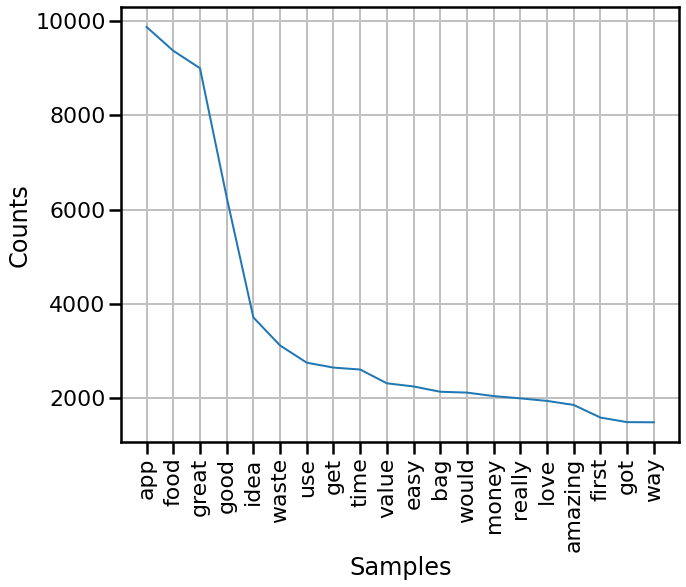

In [9]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
FreqDist(flat_list_review_content_no_stop).plot(20)
plt.show()

### Wordcloud

In [10]:
flat_clean_sum_str = " ".join(flat_list_review_content_no_stop)

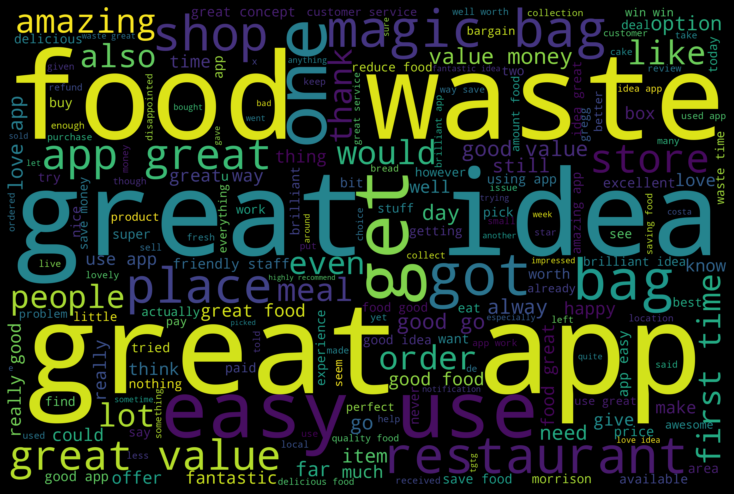

In [11]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color = 'black',
                      stopwords = stop_words)

wordcloud.generate(flat_clean_sum_str)

plt.figure(figsize = (10,10),
           facecolor = 'k',
           edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [13]:
stemmer = PorterStemmer()
lemmy = WordNetLemmatizer()

In [14]:
def apply_stem(text):
    
    text_split = text.split(' ')
    stem_text = ''
    for word in text_split:
        stem_text += stemmer.stem(word) + ' '
        
    return stem_text


def apply_lem(text):
    
    text_split = text.split(' ')
    lem_v_text = ''
    for word in text_split:
        lem_v_text += lemmy.lemmatize(word, pos='v') + ' '
        
    text_split = lem_v_text.split(' ')
    lem_text = ''
    for word in text_split:
        lem_text += lemmy.lemmatize(word, pos='a') + ' '
        
    return lem_text

In [15]:
df['review_stemmed'] = df['review_content'].apply(apply_stem)
df['review_lemmed'] = df['review_content'].apply(apply_lem)

In [16]:
review_index_to_check = 1013
print("ORIGINAL REVIEW:",'\n',df['review_content'].iloc[review_index_to_check],'\n')
print("STEMMED REIVEW:",'\n',df['review_stemmed'].iloc[review_index_to_check],'\n')
print("LEMMED REVIEW:",'\n',df['review_lemmed'].iloc[review_index_to_check],'\n')

ORIGINAL REVIEW: 
 This app is perfect, and it works well (in France). It's a great concept; it's everything it says it is, and the food is usually great and cheap. I also love that the app partnered with NGOs to give food to the homeless through TGTG, and that the minimum donation (/basket) is 2€, so it's affordable for everyone. 

STEMMED REIVEW: 
 thi app is perfect, and it work well (in france). it' a great concept; it' everyth it say it is, and the food is usual great and cheap. i also love that the app partner with ngo to give food to the homeless through tgtg, and that the minimum donat (/basket) is 2€, so it' afford for everyone.  

LEMMED REVIEW: 
 This app be perfect, and it work well (in France). It's a great concept; it's everything it say it is, and the food be usually great and cheap. I also love that the app partner with NGOs to give food to the homeless through TGTG, and that the minimum donation (/basket) be 2€, so it's affordable for everyone.   



In [28]:
df=df[["review_content","rating","source","date","review_lemmed"]]

### Train test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['rating','source','date']), 
                                                    df['rating'], 
                                                    test_size=.2, 
                                                    random_state=0)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18857, 2)
(4715, 2)
(18857,)
(4715,)


In [33]:
y_train_df = pd.DataFrame(y_train).reset_index(drop=True)
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

### Reshaping X_train because of imbalanced dataset (too many 5 star reviews)

In [93]:
# checking of nb of 5* reviews
(y_train == 5).sum()

14624

In [104]:
# checking of nb of 5* reviews
len(np.where(y_train==1)[0])

1659

In [101]:
# creation of a 'to_delete' variable storing the 10000 samples of 5* reviews
to_remove = np.random.choice(np.where(y_train==5)[0],size=12965,replace=False)

In [102]:
# storing the reshaped data in X_train_bis based on the 'to_keep' variable containing the sample to be kept
X_train_bis = X_train.drop(X_train.index[list(to_remove)])

In [103]:
X_train_bis

,review_content,review_lemmed
19810,I love the concept but can't use it as I'm not...,I love the concept but can't use it as I'm not...
7508,Good variety and much better than the last one,Good variety and much good than the last one
3590,some bags are great others a but naff but that...,some bag be great others a but naff but that's...
13969,The app hasn't changed in days no boxs for mor...,The app hasn't change in days no box for morri...
11987,Overall it's pretty good. It can be frustratin...,Overall it's pretty good. It can be frustrate ...
...,...,...
15832,"Great idea, great app, great food!","Great idea, great app, great food!"
22258,Amazing food if you can get the bags I've now ...,Amazing food if you can get the bag I've now h...
20757,No notifications Love the app but it’s a case ...,No notifications Love the app but it’s a case ...
21243,No refunds for no food Refused a refund for no...,No refund for no food Refused a refund for not...


In [107]:
# creation of a 'to_keep' variable storing the reviews to be kept
to_keep = set(range(len(X_train))) - set(to_remove)
len(to_keep)

5892

In [108]:
# storing the corresponding y of reshaped data in y_train_bis, based on the 'to_keep' variable containing the sample to be kept
y_train_bis = np.array(y_train)[list(to_keep)]

In [117]:
y_train_bis_df = pd.DataFrame(y_train_bis).reset_index(drop=True)

In [109]:
# checking of the size of X_train_bis & y_train_bis
X_train_bis.shape, y_train_bis.shape, X_train.shape

((5892, 2), (5892,), (18857, 2))

In [110]:
len(np.where(y_train_bis==5)[0])

1659

### Tf-idf vectorisation for review

In [112]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect = TfidfVectorizer(lowercase=True,
                              tokenizer = tokenizer.tokenize, 
                              stop_words=stop_words, 
                              ngram_range=(1,3),
                              min_df = 0.05)
 
X_lemm_train_tfidf_sparse = tf_idf_vect.fit_transform(X_train_bis['review_lemmed'])

X_lemm_test_tfidf_sparse = tf_idf_vect.transform(X_test['review_lemmed'])


X_lemm_train_tfidf = pd.DataFrame(X_lemm_train_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())

X_lemm_test_tfidf = pd.DataFrame(X_lemm_test_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())


X_lemm_train_tfidf.head()

,app,available,bag,buy,concept,could,day,easy,even,experience,...,store,time,try,use,value,waste,way,work,worth,would
0,0.000000,0.00000,0.000000,0.0,0.514601,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.389688,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.784635,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.302565,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.429317,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.257001,0.51121,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.364664,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
print(X_lemm_train_tfidf.shape)
print(X_lemm_test_tfidf.shape)
print(y_train_bis_df.shape)
print(y_test_df.shape)

(5892, 50)
(4715, 50)
(5892, 1)
(4715, 1)


In [116]:
X_lemm_train_tfidf.to_pickle('X_train_data.pkl')
X_lemm_test_tfidf.to_pickle('X_test_data.pkl')

In [118]:
y_train_bis_df.to_pickle('y_train_data.pkl')
y_test_df.to_pickle('y_test_data.pkl')